# Charts for tourist-perspective images project

In [32]:
fontsize = 24

# Imports

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Classes

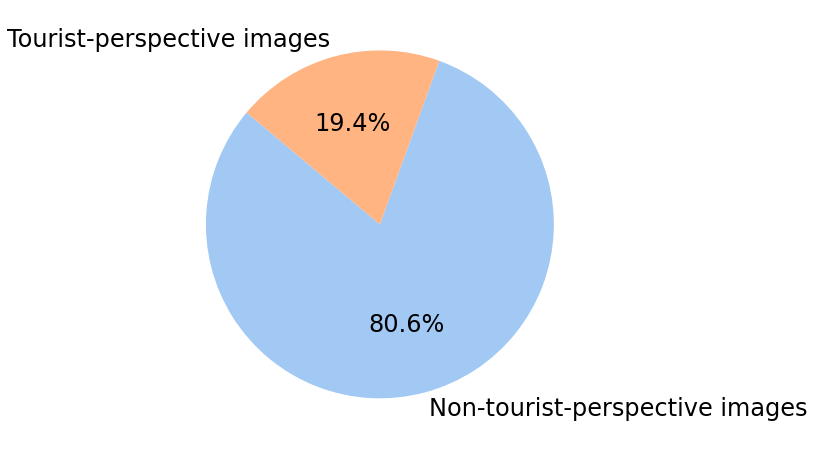

In [13]:
# Load data into a pandas DataFrame

colors = sns.color_palette('pastel')[0:20]

data1 = pd.read_csv(r'Instagram Top-10 Israeli Cities dataset_part1.csv')
data2 = pd.read_csv(r'Instagram Top-10 Israeli Cities dataset_part2.csv')
data = pd.concat([data1, data2], ignore_index=True)

# Define the array of values to remove
values_to_remove = ['zichronyaakov', 'tiberias','caesarea']

# Create a boolean mask to identify rows where 'City_hashtag' is in the values_to_remove array
mask = ~data['City_hashtag'].isin(values_to_remove)

# Filter the DataFrame to keep only the rows that don't match the values_to_remove
data = data[mask]

# Capitalize the city names for X-axis labels
data['City_hashtag'] = data['City_hashtag'].str.title()

# Replace class values
data['class'] = data['class'].replace({0: 'Non-tourist-perspective images', 1: 'Tourist-perspective images'})

# Group data by 'class' and count the occurrences
class_counts = data['class'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.yticks(fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.pie(class_counts, labels=class_counts.index,colors = colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': fontsize})

# Add title
#plt.title('Distribution of Classes')
plt.savefig(r'C:\Users\abiga\OneDrive - Yezreel Valley College\pyecharm\cities\figures\pie_prediction.jpg')
# Show the plot
plt.show()

703040


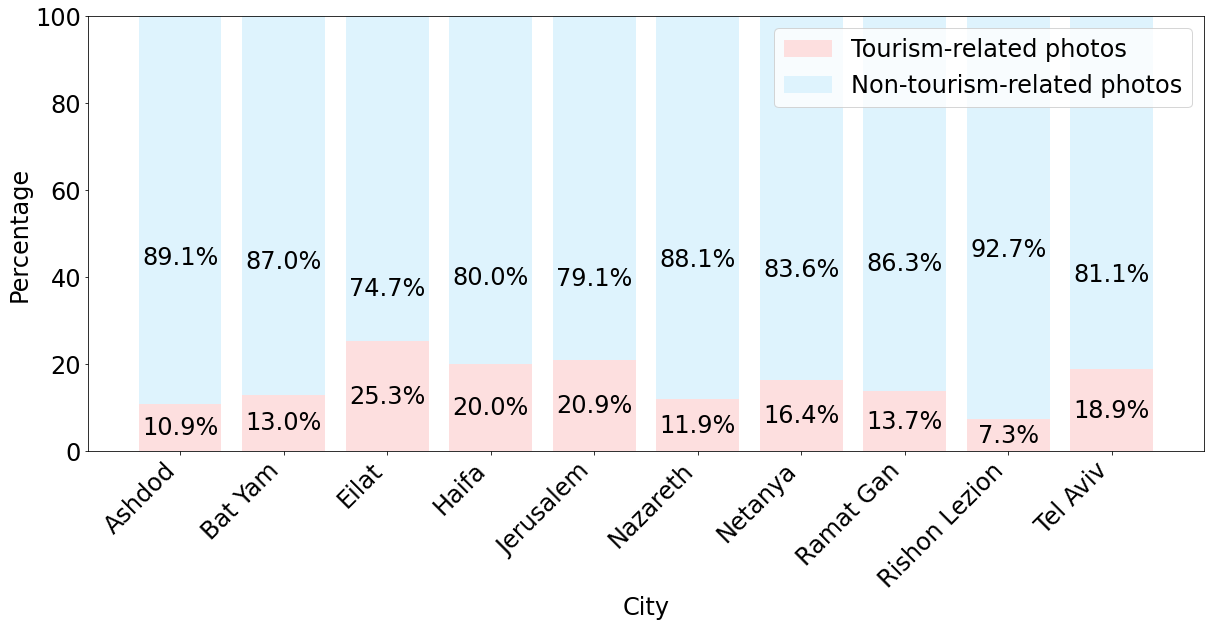

In [14]:
threshold = 0.8

# Load data into a pandas DataFrame
data1 = pd.read_csv(r'Instagram Top-10 Israeli Cities dataset_part1.csv')
data2 = pd.read_csv(r'Instagram Top-10 Israeli Cities dataset_part2.csv')
data = pd.concat([data1, data2], ignore_index=True)
# Define the threshold for filtering

# Define the array of values to remove
values_to_remove = ['zichronyaakov', 'tiberias','caesarea']

# Create a boolean mask to identify rows where 'City_hashtag' is in the values_to_remove array
mask = ~data['City_hashtag'].isin(values_to_remove)

# Filter the DataFrame to keep only the rows that don't match the values_to_remove
data = data[mask]

print(len(data. index) )
# Create a boolean mask based on the 'rate' column
mask = data['rate'] > threshold
data = data[mask]

#print(len(data. index) )
#print(len(data[data['class']==0].index))
#print(len(data[data['class']==1].index))
# Capitalize the city names for X-axis labels
data['City_hashtag'] = data['City_hashtag'].replace({'ramatgan': 'ramat gan','telaviv': 'tel aviv', 'batyam': 'bat yam','rishonlezion': 'rishon lezion','batyam': 'bat yam'})
data['City_hashtag'] = data['City_hashtag'].str.title()



# Replace class values
data['class'] = data['class'].replace({0: 'Non-tourism-related photos', 1: 'Tourism-related photos'})

# Group data by 'City_hashtag' and 'class' and calculate the counts
grouped_data = data.groupby(['City_hashtag', 'class']).size().unstack(fill_value=0)

# Calculate the total counts for each city
city_total_counts = grouped_data.sum(axis=1)

# Calculate the percentage of each class based on the count of that class within the city
percentage_data = (grouped_data.T / city_total_counts).T * 100

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(20, 8))

bottom = None
# Store label positions for each class within each bar
label_positions = {'Tourism-related photos': {}, 'Non-tourism-related photos': {}}
for class_name in ['Tourism-related photos', 'Non-tourism-related photos']:
    heights = percentage_data[class_name]
    if bottom is not None:
        ax.bar(percentage_data.index, heights, label=class_name, bottom=bottom, color='#def3fd')
        bottom += heights
    else:
        ax.bar(percentage_data.index, heights, label=class_name,color='#fddfdf')
        bottom = heights

    # Calculate label positions for each class within each bar
    for i, city in enumerate(percentage_data.index):
        label_positions[class_name][city] = heights[i] / 2  # Set label position to the middle of the bar

# Calculate the percentage of each class based on the count of that class within the city
percentage_data = (grouped_data.T / city_total_counts).T * 100        
        
# Add text labels to each part of the bar with percentages
for class_name in ['Tourism-related photos', 'Non-tourism-related photos']:
    for city in percentage_data.index:
        percentage = percentage_data.loc[city, class_name]
        ax.text(city, label_positions[class_name][city], f'{percentage:.1f}%', ha='center', va='center', fontsize=fontsize)  

# Add labels and title
ax.set_xlabel('City',fontsize = fontsize)
ax.set_ylabel('Percentage',fontsize = fontsize)
#ax.set_title('Distrbution of Class by City')
ax.legend(fontsize = fontsize)

# Set Y-axis limits to display percentages from 0% to 100%
ax.set_ylim(0, 100)

# Set custom tick positions and labels based on percentage_data
custom_labels = []
tick_positions = range(len(percentage_data))
for i, city in enumerate(percentage_data.index):
    custom_labels.append(f'{city}')
    
ax.set_xticks(tick_positions)
ax.set_xticklabels(custom_labels, rotation=45, ha="right",fontsize=fontsize)
plt.xticks(fontsize=fontsize) 
plt.yticks(fontsize=fontsize)

#plt.tight_layout()
plt.savefig(r'C:\Users\abiga\OneDrive - Yezreel Valley College\pyecharm\cities\figures\percent_per_city2.png')
plt.show()


# Distribution of Classes above 0.9 rate

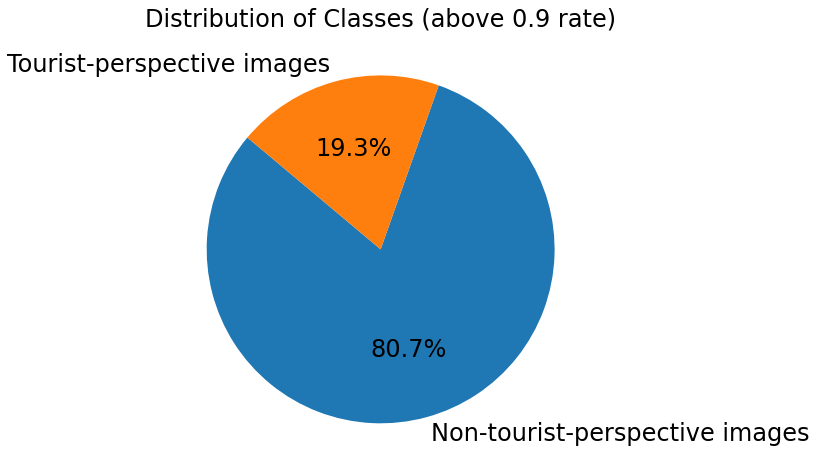

In [15]:
# Load data into a pandas DataFrame
data1 = pd.read_csv(r'Instagram Top-10 Israeli Cities dataset_part1.csv')
data2 = pd.read_csv(r'Instagram Top-10 Israeli Cities dataset_part2.csv')
data = pd.concat([data1, data2], ignore_index=True)

# Define the array of values to remove
values_to_remove = ['zichronyaakov', 'tiberias','caesarea']

# Create a boolean mask to identify rows where 'City_hashtag' is in the values_to_remove array
mask = ~data['City_hashtag'].isin(values_to_remove)

# Filter the DataFrame to keep only the rows that don't match the values_to_remove
data = data[mask]

# Capitalize the city names for X-axis labels
data['City_hashtag'] = data['City_hashtag'].str.title()

# Replace class values
data['class'] = data['class'].replace({0: 'Non-tourist-perspective images', 1: 'Tourist-perspective images'})

# Define the threshold for filtering
threshold = 0.9

# Create a boolean mask based on the 'rate' column
mask = data['rate'] > threshold

# Filter the DataFrame to keep only rows where 'rate' is greater than the threshold
data = data[mask]

# Group data by 'class' and count the occurrences
class_counts = data['class'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': fontsize})

# Add title
plt.title('Distribution of Classes (above 0.9 rate)',fontsize = fontsize)

# Show the plot
plt.show()

# Histogram of rates

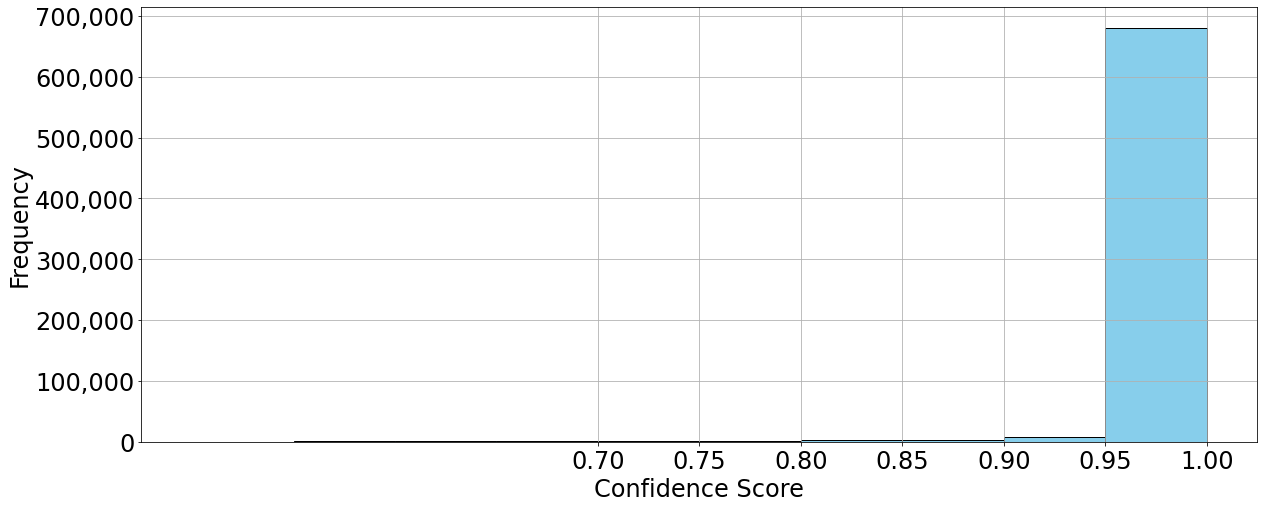

In [16]:
from matplotlib.ticker import FuncFormatter
import pandas as pd
import matplotlib.pyplot as plt

# Load data into a pandas DataFrame
data1 = pd.read_csv(r'Instagram Top-10 Israeli Cities dataset_part1.csv')
data2 = pd.read_csv(r'Instagram Top-10 Israeli Cities dataset_part2.csv')
data = pd.concat([data1, data2], ignore_index=True)

# Define the array of values to remove
values_to_remove = ['zichronyaakov', 'tiberias', 'caesarea']

# Create a boolean mask to identify rows where 'City_hashtag' is in the values_to_remove array
mask = ~data['City_hashtag'].isin(values_to_remove)

# Filter the DataFrame to keep only the rows that don't match the values_to_remove
data = data[mask]

# Capitalize the city names for X-axis labels
data['City_hashtag'] = data['City_hashtag'].str.title()

# Replace class values
data['class'] = data['class'].replace({0: 'Non city related', 1: 'City related'})

# Create a histogram of the 'rate' column with fixed bin edges
fig, ax = plt.subplots(figsize=(20, 8))
plt.hist(data['rate'], bins=[0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1], color='skyblue', edgecolor='black')

plt.xticks([ 0.7, 0.75, 0.8, 0.85, 0.9, 0.95,1], fontsize=fontsize)
plt.yticks(fontsize=fontsize)

# Add labels and title
plt.xlabel('Confidence Score', fontsize=fontsize)
plt.ylabel('Frequency', fontsize=fontsize)


ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

# Show the plot
plt.grid(True)
plt.savefig(r'C:\Users\abiga\OneDrive - Yezreel Valley College\pyecharm\cities\figures\histogram.png')
plt.show()


# Images count by cities

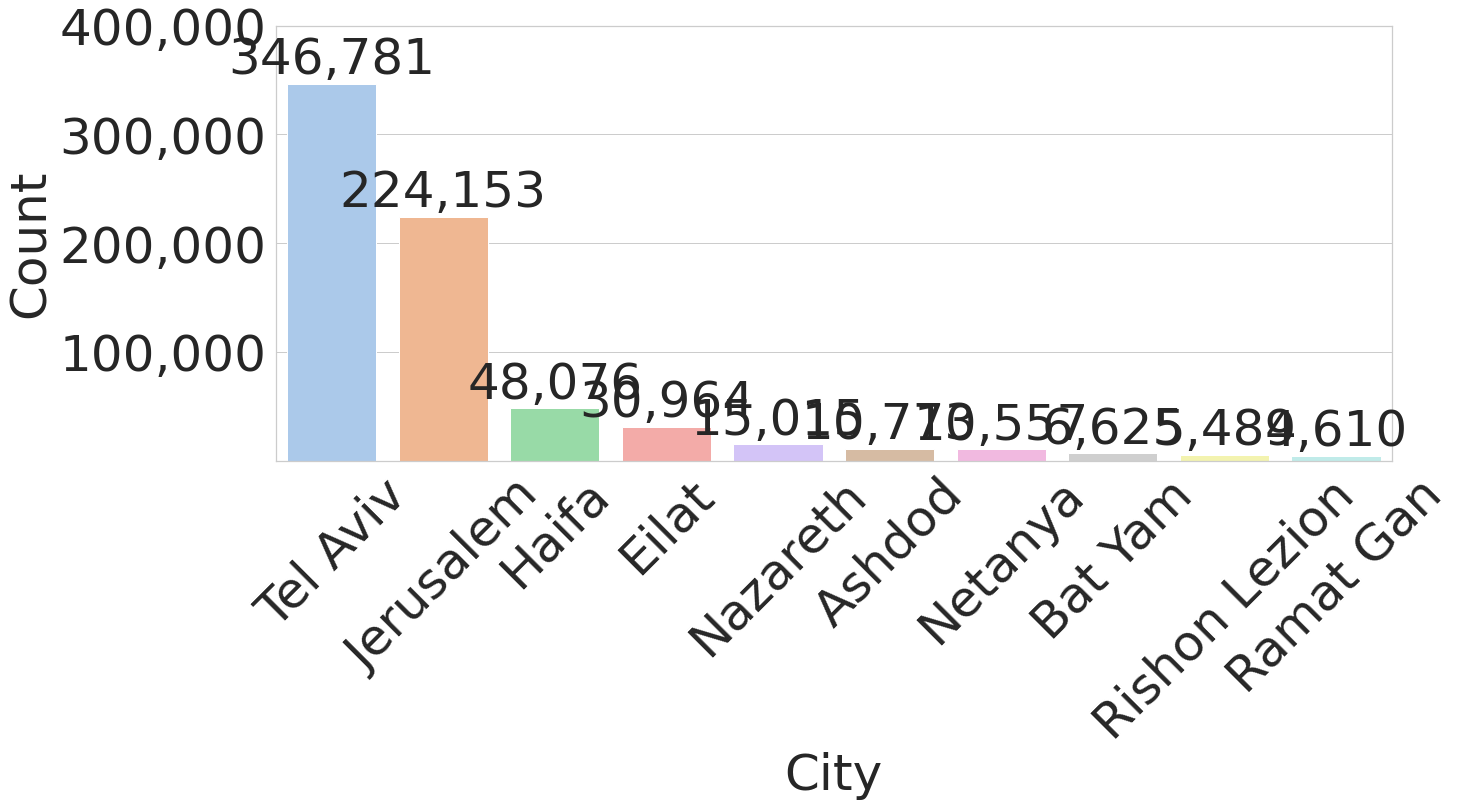

In [31]:
from matplotlib.ticker import FuncFormatter

# Load data into a pandas DataFrame
data = pd.read_csv("Figure_6_image_count_by_city.csv")
data = data.sort_values(by='number of download results', ascending=False)
data['city'] = data['city'].replace({'ramatgan': 'ramat gan','telaviv': 'tel aviv', 'batyam': 'bat yam','rishonlezion': 'rishon lezion','batyam': 'bat yam'})
data['city'] = data['city'].str.title()

plt.figure(figsize=(20, 8)) 
colors = sns.color_palette('pastel')[0:20]

# Create the bar plot
ax = sns.barplot(x='city', y='number of download results', data=data, palette=colors)

# Add labels and title
plt.xlabel('City', fontsize =fontsize)
plt.ylabel('Count', fontsize=fontsize)
#plt.title('Number of download results by city')
plt.xticks(rotation=45,fontsize=fontsize)  # Rotate x-axis labels for better visibility
plt.yticks([100000,200000,300000,400000],fontsize=fontsize)
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))


# Annotate each bar with its Y-value
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=fontsize)

# Show the plot

plt.savefig(r'C:\Users\abiga\OneDrive - Yezreel Valley College\pyecharm\cities\figures\cities_dataset_count.png')
plt.show()

# Mean comments by City and Class

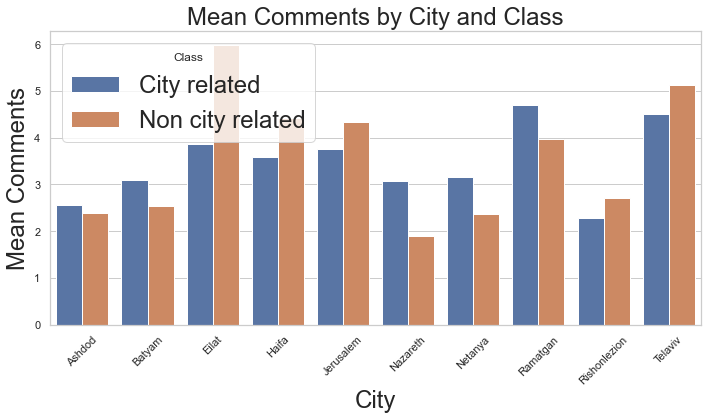

In [18]:
# Load data into a pandas DataFrame
data1 = pd.read_csv(r'Instagram Top-10 Israeli Cities dataset_part1.csv')
data2 = pd.read_csv(r'Instagram Top-10 Israeli Cities dataset_part2.csv')
data = pd.concat([data1, data2], ignore_index=True)

# Define the array of values to remove
values_to_remove = ['zichronyaakov', 'tiberias','caesarea']

# Create a boolean mask to identify rows where 'City_hashtag' is in the values_to_remove array
mask = ~data['City_hashtag'].isin(values_to_remove)

# Filter the DataFrame to keep only the rows that don't match the values_to_remove
data = data[mask]

# Capitalize the city names for X-axis labels
data['City_hashtag'] = data['City_hashtag'].str.title()

# Replace class values
data['class'] = data['class'].replace({0: 'Non city related', 1: 'City related'})

# Group data and calculate mean commends
grouped_data = data.groupby(['City_hashtag', 'class'])['comments'].mean().reset_index()

# Create a bar chart using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot

plt.figure(figsize=(10, 6))  # Set the figure size

# Create the bar plot
sns.barplot(x='City_hashtag', y='comments', hue='class', data=grouped_data)

# Add labels and title
plt.xlabel('City',fontsize=fontsize)
plt.ylabel('Mean Comments',fontsize=fontsize)
plt.title('Mean Comments by City and Class',fontsize=fontsize)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.legend(title='Class',fontsize=fontsize)
plt.tight_layout()
plt.show()

# Mean comments by Class

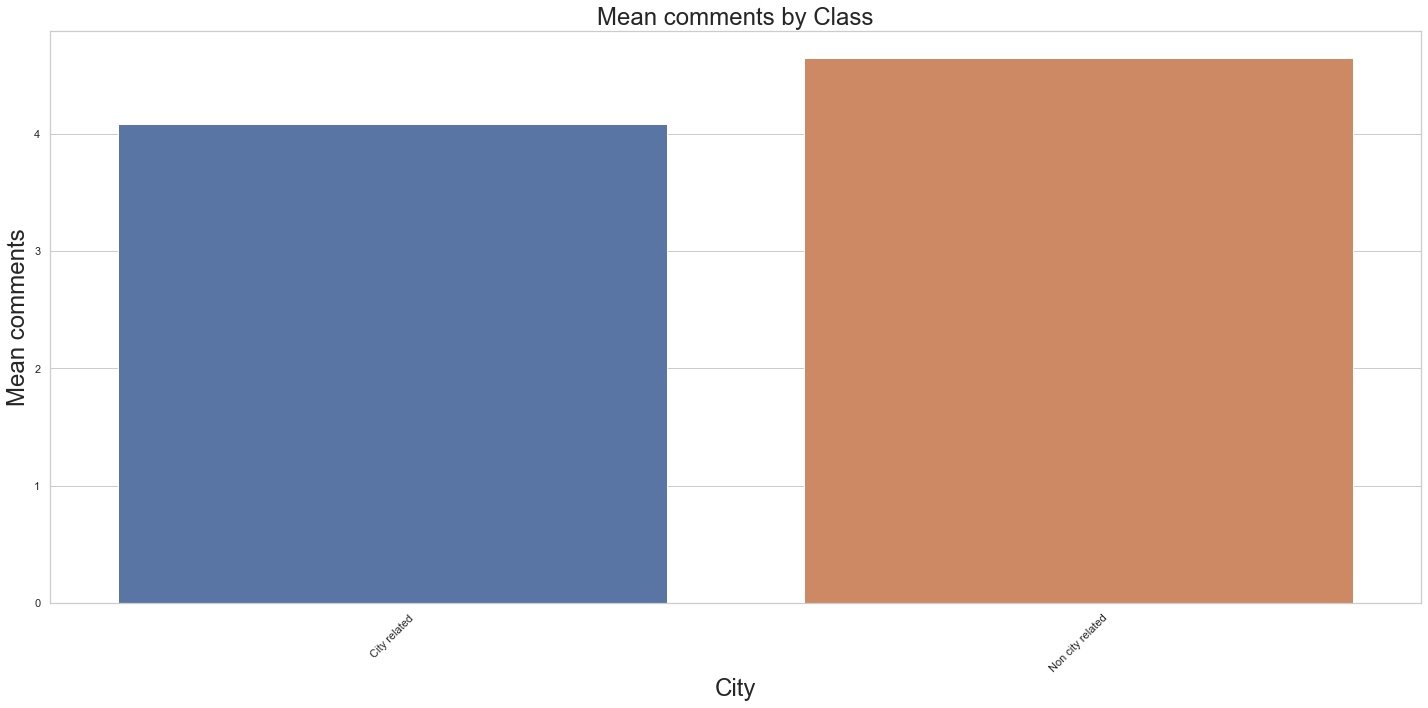

In [19]:
# Load data into a pandas DataFrame
data1 = pd.read_csv(r'Instagram Top-10 Israeli Cities dataset_part1.csv')
data2 = pd.read_csv(r'Instagram Top-10 Israeli Cities dataset_part2.csv')
data = pd.concat([data1, data2], ignore_index=True)

# Define the array of values to remove
values_to_remove = ['zichronyaakov', 'tiberias','caesarea']

# Create a boolean mask to identify rows where 'City_hashtag' is in the values_to_remove array
mask = ~data['City_hashtag'].isin(values_to_remove)

# Filter the DataFrame to keep only the rows that don't match the values_to_remove
data = data[mask]

# Capitalize the city names for X-axis labels
data['City_hashtag'] = data['City_hashtag'].str.title()

# Replace class values
data['class'] = data['class'].replace({0: 'Non city related', 1: 'City related'})

# Group data and calculate mean likes
grouped_data = data.groupby(['class'])['comments'].mean().reset_index()

# Create a bar chart using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot



# Create the bar plot
sns.barplot(x='class', y='comments', data=grouped_data)

# Add labels and title
plt.xlabel('City',fontsize=fontsize)
plt.ylabel('Mean comments',fontsize=fontsize)
plt.title('Mean comments by Class',fontsize=fontsize)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.tight_layout()
plt.show()



# Mean Likes by City and Class

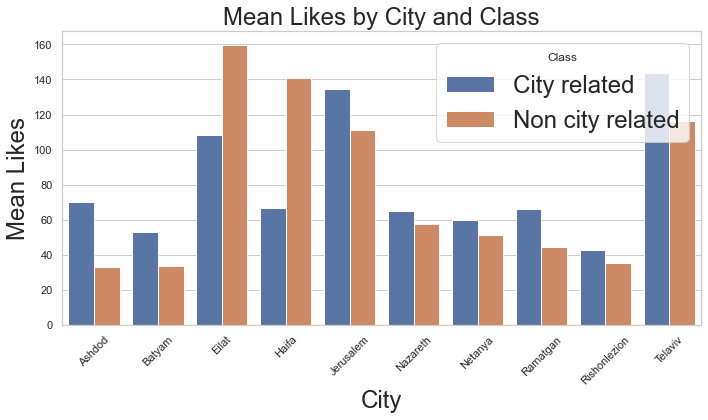

In [20]:
# Load data into a pandas DataFrame
data1 = pd.read_csv(r'Instagram Top-10 Israeli Cities dataset_part1.csv')
data2 = pd.read_csv(r'Instagram Top-10 Israeli Cities dataset_part2.csv')
data = pd.concat([data1, data2], ignore_index=True)

# Define the array of values to remove
values_to_remove = ['zichronyaakov', 'tiberias','caesarea']

# Create a boolean mask to identify rows where 'City_hashtag' is in the values_to_remove array
mask = ~data['City_hashtag'].isin(values_to_remove)

# Filter the DataFrame to keep only the rows that don't match the values_to_remove
data = data[mask]

# Capitalize the city names for X-axis labels
data['City_hashtag'] = data['City_hashtag'].str.title()

# Replace class values
data['class'] = data['class'].replace({0: 'Non city related', 1: 'City related'})

# Group data and calculate mean likes
grouped_data = data.groupby(['City_hashtag', 'class'])['likes'].mean().reset_index()

# Create a bar chart using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot

plt.figure(figsize=(10, 6))  # Set the figure size

# Create the bar plot
sns.barplot(x='City_hashtag', y='likes', hue='class', data=grouped_data)

# Add labels and title
plt.xlabel('City',fontsize=fontsize)
plt.ylabel('Mean Likes',fontsize=fontsize)
plt.title('Mean Likes by City and Class',fontsize=fontsize)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.legend(title='Class',fontsize=fontsize)
plt.tight_layout()
plt.show()




# Mean Likes by City and Class above 0.9 rate

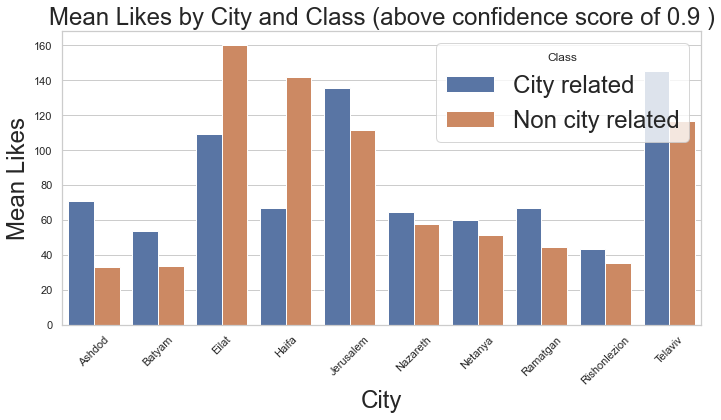

In [21]:
# Load data into a pandas DataFrame
data1 = pd.read_csv(r'Instagram Top-10 Israeli Cities dataset_part1.csv')
data2 = pd.read_csv(r'Instagram Top-10 Israeli Cities dataset_part2.csv')
data = pd.concat([data1, data2], ignore_index=True)

# Define the array of values to remove
values_to_remove = ['zichronyaakov', 'tiberias','caesarea']

# Create a boolean mask to identify rows where 'City_hashtag' is in the values_to_remove array
mask = ~data['City_hashtag'].isin(values_to_remove)

# Filter the DataFrame to keep only the rows that don't match the values_to_remove
data = data[mask]

# Capitalize the city names for X-axis labels
data['City_hashtag'] = data['City_hashtag'].str.title()

# Replace class values
data['class'] = data['class'].replace({0: 'Non city related', 1: 'City related'})

# Group data and calculate mean likes
grouped_data = data.groupby(['City_hashtag', 'class'])['likes'].mean().reset_index()

# Define the threshold for filtering
threshold = 0.9

# Create a boolean mask based on the 'rate' column
mask = data['rate'] > threshold

# Filter the DataFrame to keep only rows where 'rate' is greater than the threshold
data = data[mask]

# Group data and calculate mean likes
grouped_data = data.groupby(['City_hashtag', 'class'])['likes'].mean().reset_index()

# Create a bar chart using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot

plt.figure(figsize=(10, 6))  # Set the figure size

# Create the bar plot
sns.barplot(x='City_hashtag', y='likes', hue='class', data=grouped_data)

# Add labels and title
plt.xlabel('City',fontsize=fontsize)
plt.ylabel('Mean Likes',fontsize=fontsize)
plt.title('Mean Likes by City and Class (above confidence score of 0.9 )',fontsize=fontsize)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.legend(title='Class',fontsize=fontsize)
plt.tight_layout()
plt.show()

# Mean likes by Class

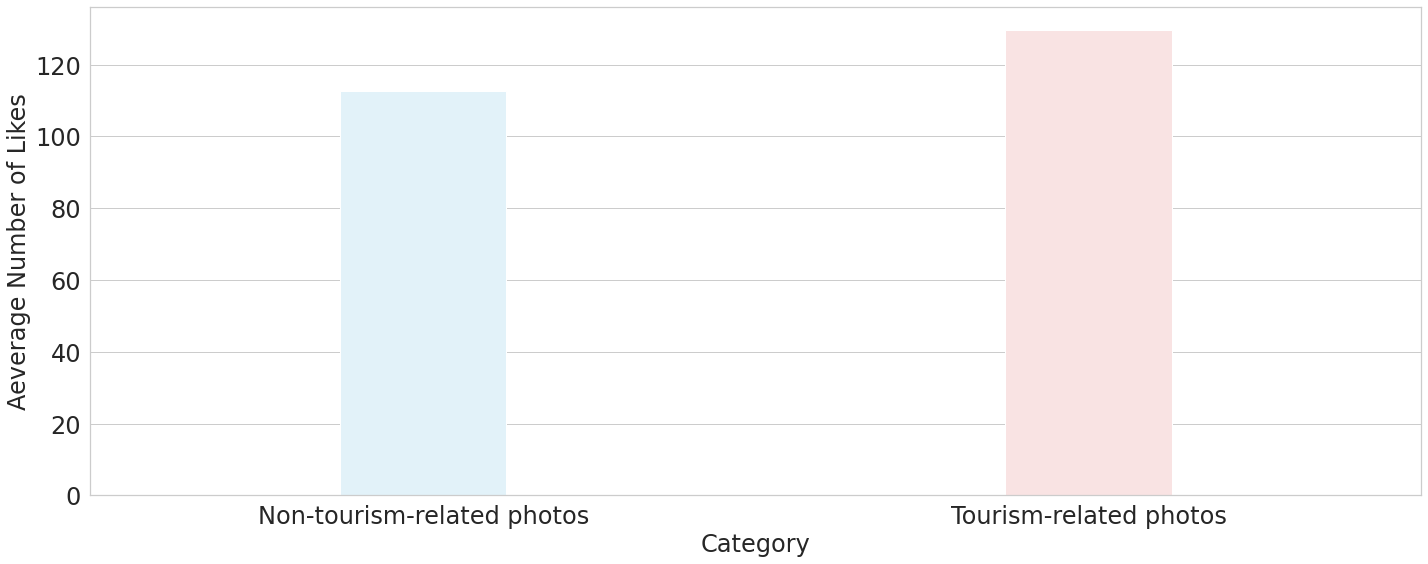

In [33]:
threshold=0.8

# Load data into a pandas DataFrame
data1 = pd.read_csv(r'Instagram Top-10 Israeli Cities dataset_part1.csv')
data2 = pd.read_csv(r'Instagram Top-10 Israeli Cities dataset_part2.csv')
data = pd.concat([data1, data2], ignore_index=True)
plt.figure(figsize=(20, 8)) 

# Define the array of values to remove
values_to_remove = ['zichronyaakov', 'tiberias','caesarea']

# Create a boolean mask to identify rows where 'City_hashtag' is in the values_to_remove array
mask = ~data['City_hashtag'].isin(values_to_remove)

# Filter the DataFrame to keep only the rows that don't match the values_to_remove
data = data[mask]

# Create a boolean mask based on the 'rate' column
mask = data['rate'] > threshold

# Filter the DataFrame to keep only rows where 'rate' is greater than the threshold
data = data[mask]

# Capitalize the city names for X-axis labels
data['City_hashtag'] = data['City_hashtag'].str.title()

# Replace class values
data['class'] = data['class'].replace({0: 'Non-tourism-related photos', 1: 'Tourism-related photos'})

# Group data and calculate mean likes
grouped_data = data.groupby(['class'])['likes'].mean().reset_index()

# Create a bar chart using Seaborn
#sns.set(style="whitegrid")  # Set the style of the plot



# Create the bar plot
ax = sns.barplot(x='class', y='likes', data=grouped_data,palette=['#def3fd','#fddfdf'])

# Add labels and title
plt.xlabel('Category', fontsize=fontsize)
plt.ylabel('Aeverage Number of Likes', fontsize=fontsize)
#plt.title('Mean Likes by Class')
plt.xticks(rotation=0,fontsize=fontsize)  # Rotate x-axis labels for better visibility
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

# Show the plot
plt.tight_layout()
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .25)
plt.savefig(r'C:\Users\abiga\OneDrive - Yezreel Valley College\pyecharm\cities\figures\Mean_Likes.png')
plt.show()



# Val results

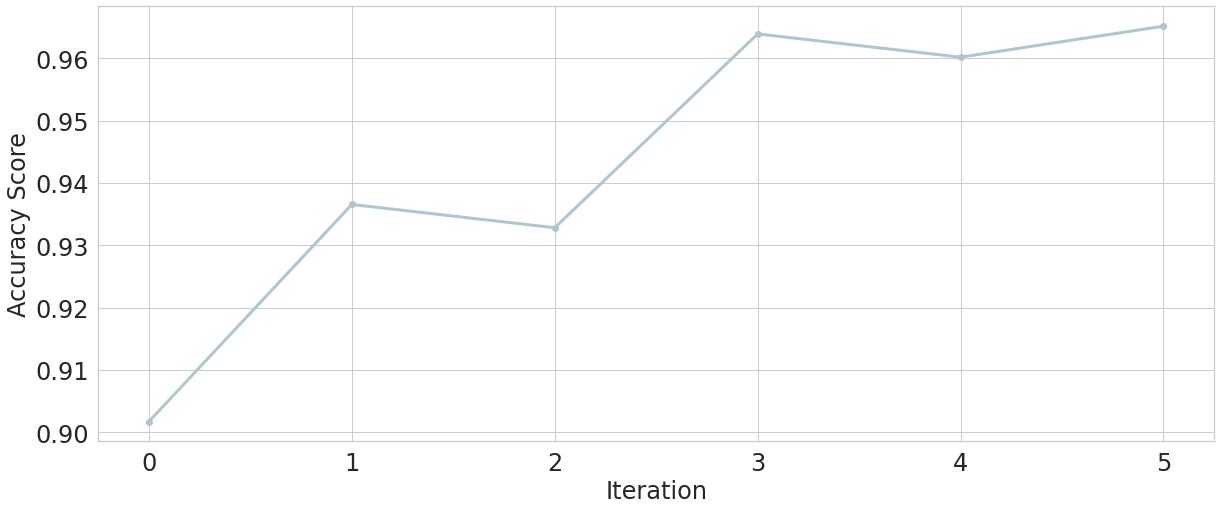

,Model,round_num,Accuracy,Recall,Precision,F1,F1_macro,F1_weighted,n_class,len_of_testset,num_0_class_in_test,num_1_class_in_test
0,VVG19,0,0.901741,0.739286,0.971831,0.839757,0.884452,0.898017,2,804,524,280
1,VVG19,1,0.936567,0.885714,0.928839,0.906764,0.929348,0.936202,2,804,524,280
2,VVG19,2,0.932836,0.975000,0.853125,0.910000,0.928214,0.933742,2,804,524,280
3,VVG19,3,0.963930,0.939286,0.956364,0.947748,0.960104,0.963854,2,804,524,280
4,VVG19,4,0.960199,0.939286,0.946043,0.942652,0.956088,0.960166,2,804,524,280
5,VVG19,5,0.965174,0.921429,0.977273,0.948529,0.961107,0.964924,2,804,524,280


In [23]:
# Load data into a pandas DataFrame
data = pd.read_csv(r'Instagram Top-10 Israeli Cities dataset_Classifier_Performance.csv')
data.head()

# Create the plots
plt.figure(figsize=(20, 8))
plt.plot(data['round_num'], data['Accuracy'], marker='o',color ='#AEC6CF',linewidth=3)
#plt.plot(data['round_num'], data['Recall'], marker='o', label='Recall',color ='#FFD1DC',linewidth=3)
#plt.plot(data['round_num'], data['Precision'], marker='o', label='Precision',color ='#B0E57C',linewidth=3)
#plt.plot(data['round_num'], data['F1'], marker='o', label='F1-score',color ='#FFB347',linewidth=3)
#plt.plot(data['round_num'], data['F1_macro'], marker='o', label='F1_macro')
#plt.plot(data['round_num'], data['F1_weighted'], marker='o', label='F1_weighted')

# Add labels and legend
plt.xlabel('Iteration', fontsize=fontsize)
plt.ylabel('Accuracy Score',fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
#plt.title('Val results')
#plt.legend(fontsize=fontsize)

plt.rcParams['font.family'] = 'DejaVu Sans'
# Show the plot
plt.grid(True)
plt.savefig(r'C:\Users\abiga\OneDrive - Yezreel Valley College\pyecharm\cities\figures\validation_result.png')
plt.show()
data

# Test results charts

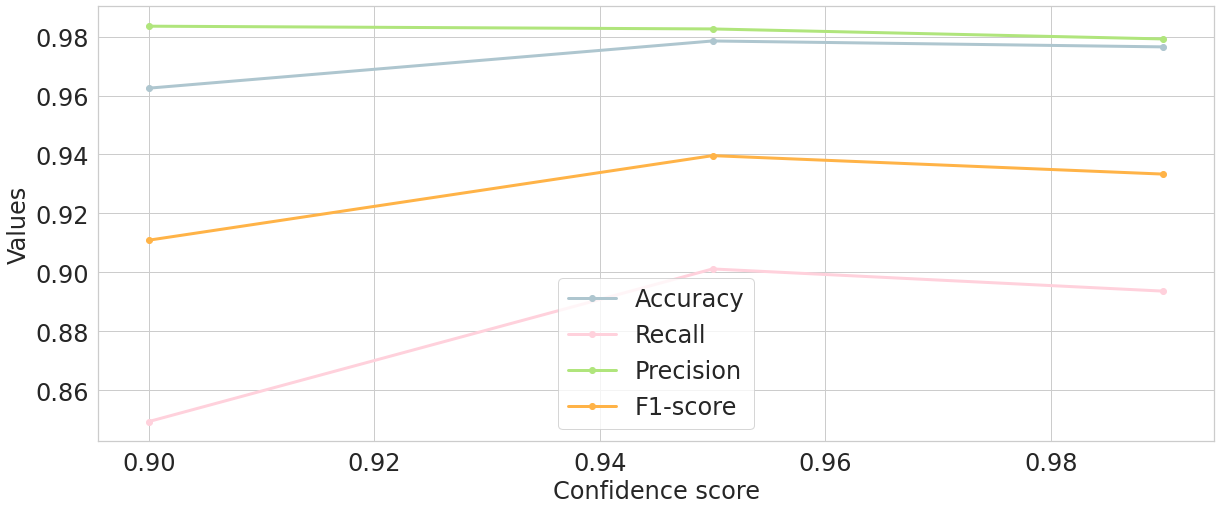

In [24]:
# Load data into a pandas DataFrame
data = pd.read_excel(r'InstaCities100K_dataset_classifier_test_set_by_confidence.csv')

# Create rate array
rates = [0.9,0.95,0.99]

# Create array for results
acc = [] #accuracy
rec = [] #recall
pre = [] #precision
f1s = [] #F1score

# Calc the results
for index in range(len(data)):
    temp = data.iloc[index]
    
    accuracy_values = []
    recall_values = []
    precision_values = []
    f1_score_values = []
    
    for rate in rates:
        TP = temp['TP'+str(rate)]
        TN = temp["TN"+str(rate)]
        FP = temp['FP'+str(rate)]
        FN = temp["FN"+str(rate)]
        
        
        
        accuracy = (TP+TN)/(TP+TN+FP+FN)
        recall = (TP)/(TP+FN)
        precision = (TP)/(TP+FP)
        f1score = 2 * (precision * recall) / (precision + recall)
        
        accuracy_values.append(accuracy)
        recall_values.append(recall)
        precision_values.append(precision)
        f1_score_values.append(f1score)
        
    """
    # Create chart of each city
    
    # Create a line chart
    plt.figure(figsize=(10, 6))
    plt.plot(rates, accuracy_values, marker='o', label='Accuracy')
    plt.plot(rates, recall_values, marker='o', label='Recall')
    plt.plot(rates, precision_values, marker='o', label='Precision')
    plt.plot(rates, f1_score_values, marker='o', label='F1-score')

    # Add labels and legend
    plt.xlabel('Rates')
    plt.ylabel('Values')
    plt.title('{} test results'.format(temp['city']))
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()
    """
    acc.append(accuracy_values)
    rec.append(recall_values)
    pre.append(precision_values)
    f1s.append(f1_score_values)
    
# Crate arrays for results (cities as rows and rates as columns)
acc_data = pd.DataFrame(acc,columns=(0.9,0.95,0.99))
rec_data = pd.DataFrame(rec,columns=(0.9,0.95,0.99))
pre_data = pd.DataFrame(pre,columns=(0.9,0.95,0.99))
f1s_data = pd.DataFrame(f1s,columns=(0.9,0.95,0.99))

# Create the plots
plt.figure(figsize=(20, 8))
plt.plot(rates, acc_data.mean(axis=0), marker='o', label='Accuracy', color='#AEC6CF',linewidth=3)
plt.plot(rates, rec_data.mean(axis=0), marker='o', label='Recall', color='#FFD1DC',linewidth=3)
plt.plot(rates, pre_data.mean(axis=0), marker='o', label='Precision', color='#B0E57C',linewidth=3)
plt.plot(rates, f1s_data.mean(axis=0), marker='o', label='F1-score', color='#FFB347',linewidth=3)

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

# Add labels and legend
plt.xlabel('Confidence score',fontsize=fontsize)
plt.ylabel('Values',fontsize=fontsize)
#plt.title('Mean test results')
plt.legend(fontsize=fontsize)

# Show the plot
plt.grid(True)
plt.savefig(r'C:\Users\abiga\OneDrive - Yezreel Valley College\pyecharm\cities\figures\test_result.png')
plt.show()

In [25]:
T test

SyntaxError: invalid syntax (1116195894.py, line 1)

In [ ]:
import scipy.stats as stats

threshold = 0.8

data1 = pd.read_csv(r'Instagram Top-10 Israeli Cities dataset_part1.csv')
data2 = pd.read_csv(r'Instagram Top-10 Israeli Cities dataset_part2.csv')
data = pd.concat([data1, data2], ignore_index=True)


# Define the array of values to remove
values_to_remove = ['zichronyaakov', 'tiberias','caesarea']

# Create a boolean mask to identify rows where 'City_hashtag' is in the values_to_remove array
mask = ~data['City_hashtag'].isin(values_to_remove)

# Filter the DataFrame to keep only the rows that don't match the values_to_remove
data = data[mask]

mask = data['rate'] > threshold

# Filter the DataFrame to keep only rows where 'rate' is greater than the threshold
data = data[mask]



In [ ]:
data

In [ ]:


# Sample data for two groups
group_Non_tourist = data[data['class']==0]
group_tourist = data[data['class']==1]

group_Non_tourist_like = group_Non_tourist["likes"]
group_tourist_like = group_tourist["likes"]

# Perform the independent two-sample t-test
t_stat, p_value = stats.ttest_ind(group_Non_tourist_like, group_tourist_like)

# Print the t-statistic and p-value
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Determine if the difference is statistically significant
alpha = 0.05  # Adjust the significance level as needed
if p_value < alpha:
    print("The difference is statistically significant")
else:
    print("The difference is not statistically significant")

In [ ]:
import numpy as np
from scipy import stats

def get_dis_std_mean(lst):

  # Perform the Shapiro-Wilk test
  stat, p = stats.shapiro(lst)

  # Interpret the results
  normally = True
  alpha = 0.05
  if p > alpha:
    normally = True
  else:
    normally = False
  mean = np.mean(lst)
  std = np.std(lst)
  return normally,mean,std

In [ ]:
get_dis_std_mean(group_Non_tourist_like)

In [ ]:
get_dis_std_mean(group_tourist_like)

In [ ]:
def mannwhitneyu(a,b):

  # Perform Mann-Whitney U test
  u, p = stats.mannwhitneyu(a, b)
  formatted_p_value = "{:.8f}".format(p)
  print(formatted_p_value)
  difference = True
  # Interpret the results
  alpha = 0.05
  if p > alpha:
      difference = False
  else:
      difference = True
  return difference,u, p

In [ ]:
difference,t, p = mannwhitneyu(group_Non_tourist_like,group_tourist_like)

In [ ]:
difference

In [ ]:
t

In [ ]:
p

In [ ]:
formatted_p_value = "{:.3f}".format(p_value)
print(formatted_p_value)

In [ ]:
Test

In [ ]:
threshold = 0.8

# Load data into a pandas DataFrame
data = pd.read_csv(r'InstaCities100K_dataset_classifier_predictions.csv')
data['City'] = data['City'].replace({'sanfrancisco': 'san francisco','losangeles':'los angeles'})

print(data.size)
# Define the threshold for filtering

# Create a boolean mask based on the 'rate' column
mask = data['Rate'] > threshold
data = data[mask]
print(data.size)

# Capitalize the city names for X-axis labels
data['City'] = data['City'].str.title()

# Replace class values
data['City'] = data['City'].replace({'Newyork': 'New York'})
data['Prediction'] = data['Prediction'].replace({0: 'Non-tourism-related images', 1: 'Tourism-related images'})

# Group data by 'City_hashtag' and 'class' and calculate the counts
grouped_data = data.groupby(['City', 'Prediction']).size().unstack(fill_value=0)

# Calculate the total counts for each city
city_total_counts = grouped_data.sum(axis=1)

# Calculate the percentage of each class based on the count of that class within the city
percentage_data = (grouped_data.T / city_total_counts).T * 100

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(20, 8))

bottom = None
# Store label positions for each class within each bar
label_positions = {'Tourism-related images': {}, 'Non-tourism-related images': {}}
for class_name in ['Tourism-related images', 'Non-tourism-related images']:
    heights = percentage_data[class_name]
    if bottom is not None:
        ax.bar(percentage_data.index, heights, label=class_name, bottom=bottom, color='#def3fd')
        bottom += heights
    else:
        ax.bar(percentage_data.index, heights, label=class_name,color='#fddfdf')
        bottom = heights

    # Calculate label positions for each class within each bar
    for i, city in enumerate(percentage_data.index):
        label_positions[class_name][city] = heights[i] / 2  # Set label position to the middle of the bar

# Calculate the percentage of each class based on the count of that class within the city
percentage_data = (grouped_data.T / city_total_counts).T * 100        
        
# Add text labels to each part of the bar with percentages
for class_name in ['Tourism-related images', 'Non-tourism-related images']:
    for city in percentage_data.index:
        percentage = percentage_data.loc[city, class_name]
        ax.text(city, label_positions[class_name][city], f'{percentage:.1f}%', ha='center', va='center', fontsize=fontsize)  

# Add labels and title
ax.set_xlabel('City',fontsize = fontsize)
ax.set_ylabel('Percentage',fontsize = fontsize)
#ax.set_title('Distrbution of Class by City')
ax.legend(fontsize = fontsize)

# Set Y-axis limits to display percentages from 0% to 100%
ax.set_ylim(0, 100)

# Set custom tick positions and labels based on percentage_data
custom_labels = []
tick_positions = range(len(percentage_data))
for i, city in enumerate(percentage_data.index):
    custom_labels.append(f'{city}')
    
ax.set_xticks(tick_positions)
ax.set_xticklabels(custom_labels, rotation=45, ha="right",fontsize=fontsize)
plt.xticks(fontsize=fontsize) 
plt.yticks(fontsize=fontsize)

#plt.tight_layout()
plt.savefig(r'C:\Users\abiga\OneDrive - Yezreel Valley College\pyecharm\cities\figures\test_percent_per_city.png')
plt.show()

In [ ]:
sample  = data.sample(n=100)

In [ ]:
sample

In [ ]:
import os
import shutil
import pandas as pd
# Replace class values
data = pd.read_csv(r'InstaCities100K_dataset_classifier_predictions.csv')

s1 = data[data['City'] == 'chicago'].sample(50)
s2 = data[data['City'] =='london'].sample(50) 
s3 = data[data['City'] =='losangeles'].sample(50) 
s4 = data[data['City'] =='melbourne'].sample(50) 
s5 = data[data['City'] =='miami'].sample(50)  # Removed .index
s6 = data[data['City'] =='sanfrancisco'].sample(50) 
s7 = data[data['City'] =='singapore'].sample(50) 
s8 = data[data['City'] =='toronto'].sample(50) 
s9 = data[data['City'] =='newyork'].sample(50) 
s10 = data[data['City'] =='sydney'].sample(50) 

# Display the first 5 rows of the concatenated DataFrame
data = pd.concat([s1, s2, s3, s4, s5, s6, s7, s8, s9, s10], ignore_index=True)






source_directory = r"C:\Users\abiga\Downloads\InstaCities1M\img"
destination_directory = r"C:\Users\abiga\OneDrive - Yezreel Valley College\pyecharm\cities\world_validation_set"
file_extension = ".jpg"  # Change this to the desired file extension

for root, dirs, files in os.walk(source_directory):
    for index, row in data.iterrows():
        filename = row["Image_ID"]
        if filename.endswith(file_extension):
            image_path = os.path.join(root, filename)
            if os.path.exists(image_path):
                # Construct the destination path while preserving the directory structure
               
                new_filename = str(row["Prediction"])+'_'+row["Image_ID"]
                destination_path = os.path.join(destination_directory, new_filename)
                shutil.copy(image_path, destination_path)



# Object Detection

In [ ]:
import pandas as pd

data1 = pd.read_csv(r'objects/res_1.csv')
data2 = pd.read_csv(r'objects/res_2.csv')
data3 = pd.read_csv(r'objects/res_3.csv')
data4 = pd.read_csv(r'objects/res_4.csv')
data5 = pd.read_csv(r'objects/res_5.csv')
data6 = pd.read_csv(r'objects/res_6.csv')

#data2 = pd.read_csv(r'training_prediction2.csv')
data = pd.concat([data1, data2,data3,data4,data5,data6], ignore_index=True)
excluded_value = 'InceptionV3_conf'

# Filter the DataFrame to exclude rows with the specified value
data = data[data['InceptionV3_conf'] != excluded_value]
data["InceptionV3_conf"] = data["InceptionV3_conf"].astype(float)
all = data
result = data[data["InceptionV3_conf"]>0.2]
result['InceptionV3_class'] = result['InceptionV3_class'].replace('sunglasses', 'sunglass')

res_1 = result[result["CNN_class"]==1]
res_0 = result[result["CNN_class"]==0]

top_x = 10

# Group by 'CNN_class' and sum the occurrences of each 'InceptionV3_class'
res_1 = res_1.groupby(['CNN_class', 'InceptionV3_class']).size().reset_index(name='count')
res_1 = res_1.sort_values([ 'count'], ascending=[False])

res_0 = res_0.groupby(['CNN_class', 'InceptionV3_class']).size().reset_index(name='count')
res_0 = res_0.sort_values([ 'count'], ascending=[False])

# Sort the counts in descending order within each group

res1_100 = res_1.groupby('CNN_class').head(100)
res0_100 = res_0.groupby('CNN_class').head(100)

intersection = pd.merge(res1_100, res0_100, on='InceptionV3_class', how='inner')

# Display the number of common values
common_values = intersection['InceptionV3_class'].unique()
num_intersect_items = len(common_values)
print("Number of intersecting items:", num_intersect_items)
print(common_values)

res_1 = res_1.groupby('CNN_class').head(top_x)
res_0 = res_0.groupby('CNN_class').head(top_x)



In [ ]:
data[data["image_id"]=="'"+str(1490730189415958988)]

In [ ]:
all[all["image_id"]==str(1490730189415958988)]

In [ ]:
res0_100.head(11)

In [ ]:


res0_100.head(10)

Miniskirt
Jersey
Sunglasses
Wig
Gown
Envelope
Book jacket
Stage
Comic book
Website
        Category        Value  Count          Group Color
0       Clothing    Miniskirt   2987       Clothing   NaN
1       Clothing       Jersey   4333       Clothing   NaN
2       Clothing   Sunglasses   7227       Clothing   NaN
3       Clothing          Wig   5187       Clothing   NaN
4       Clothing         Gown   3397       Clothing   NaN
5     Stationery     Envelope   3389     Stationery   NaN
6     Stationery  Book jacket   5130     Stationery   NaN
7  Entertainment        Stage   4108  Entertainment   NaN
8  Entertainment   Comic book   6116  Entertainment   NaN
9     Technology      Website  18132     Technology   NaN


C:\Users\abiga\AppData\Local\Temp\ipykernel_9640\2227686577.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  count_df = count_df.append({'Category': group, 'Value': category, 'Count': count, 'Group': group}, ignore_index=True)
C:\Users\abiga\AppData\Local\Temp\ipykernel_9640\2227686577.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  count_df = count_df.append({'Category': group, 'Value': category, 'Count': count, 'Group': group}, ignore_index=True)
C:\Users\abiga\AppData\Local\Temp\ipykernel_9640\2227686577.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  count_df = count_df.append({'Category': group, 'Value': category, 'Count': count, 'Group': group}, ignore_index=True)
C:\Users\abiga\AppData\Local\Temp\ipyker

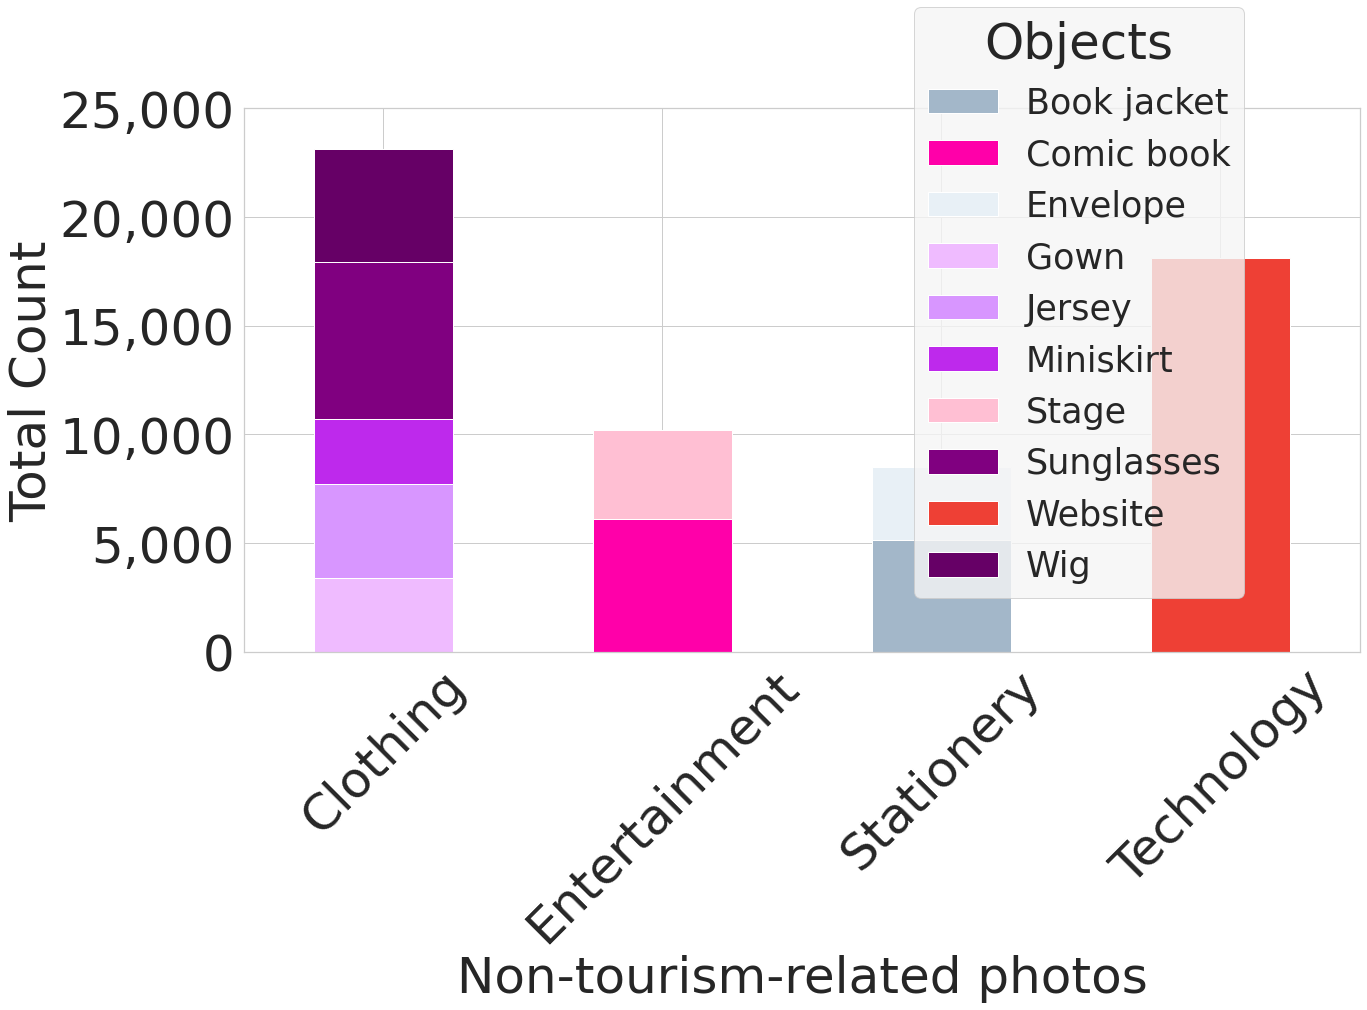

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

fontsize=50

res_0['InceptionV3_class'] = res_0['InceptionV3_class'].str.title()
res0_100['InceptionV3_class'] = res0_100['InceptionV3_class'].str.title()
res_0['InceptionV3_class'] = res_0['InceptionV3_class'].replace({'Book_Jacket': 'Book jacket','Sunglass': 'Sunglasses','Web_Site': 'Website','Web Site': 'Website', 'Web_site': 'Website','Comic_Book': 'Comic book'})
res0_100['InceptionV3_class'] = res0_100['InceptionV3_class'].replace({'Book_Jacket': 'Book jacket','Sunglass': 'Sunglasses', 'Web_Site': 'Website','Web Site': 'Website','Web_site': 'Website','Comic_Book': 'Comic book'})
res_0['InceptionV3_class'] = res_0['InceptionV3_class'].replace({'Book Jacket': 'Book jacket'})
res0_100['InceptionV3_class'] = res0_100['InceptionV3_class'].replace({'Book Jacket': 'Book jacket'})
res0_100['InceptionV3_class'] = res0_100['InceptionV3_class'].replace({'Comic Book': 'comic book'})
res_0['InceptionV3_class'] = res_0['InceptionV3_class'].replace({'Comic Book': 'comic book'})



combined_categories = {
  'Clothing': ['Miniskirt', 'Jersey', 'Sunglasses', 'Wig', 'Gown'],
    'Stationery': ['Envelope', 'Book jacket'],
    'Entertainment': ['Stage', 'Comic book'],
    'Technology': ['Website']
}

# Create an empty DataFrame to store the counts
count_df = pd.DataFrame(columns=['Category', 'Value', 'Count', 'Group', 'Color'])

# Iterate through categories and calculate counts for each value within the array
for group, categories in combined_categories.items():
    for category in categories:
        print(category)
        count = res0_100.loc[res0_100["InceptionV3_class"] == category, "count"].values[0]
        #count = res_0[res_0['InceptionV3_class'] == category]['count'].sum()
        count_df = count_df.append({'Category': group, 'Value': category, 'Count': count, 'Group': group}, ignore_index=True)

# Create the stacked bar plot using individual bars for each category
#sns.set_style("whitegrid")
print(count_df)
# Increase the figure size
plt.rcParams["figure.figsize"] = (20, 10)

# Create the stacked bar plot
ax = count_df.pivot(index='Group', columns='Value', values='Count').plot(
    kind='bar',
    color=["#a3b7c9","#ff00a9","#e8f0f6","#efbbff","#d896ff","#be29ec","#ffbfd3","#800080","#ee4035","#660066"],
    stacked=True,
)


#custom_colors=["#ffeead","#00c5ff","#00ecff","#6ae8ff","#8d5524","#c68642","#ffdbac","#e0301e","#a32020","#a8e6cf"]
# Set the custom legend with colors
#legend_labels = [Patch(facecolor=color, label=item) for item, color in colors.items()]
legend = ax.legend(fontsize=35,frameon=True,facecolor='whitesmoke', loc=(0.6, 0.1))

legend.set_title("Objects",prop={'size': fontsize})

#for text, color in zip(legend.get_texts(), custom_colors):
  #  text.set_color(color)

plt.xticks(fontsize=fontsize, rotation=45)
plt.yticks(fontsize=fontsize)
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel("Non-tourism-related photos", fontsize=fontsize)
plt.ylabel("Total Count", fontsize=fontsize)
plt.ylim(0, 25000)
plt.savefig(r'C:\Users\abiga\OneDrive - Yezreel Valley College\pyecharm\cities\figures\1.png')

plt.show()


In [ ]:
count_df

C:\Users\abiga\AppData\Local\Temp\ipykernel_9640\2484421415.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  count_df = count_df.append({'Category': group, 'Value': category, 'Count': count, 'Group': group}, ignore_index=True)
C:\Users\abiga\AppData\Local\Temp\ipykernel_9640\2484421415.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  count_df = count_df.append({'Category': group, 'Value': category, 'Count': count, 'Group': group}, ignore_index=True)
C:\Users\abiga\AppData\Local\Temp\ipykernel_9640\2484421415.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  count_df = count_df.append({'Category': group, 'Value': category, 'Count': count, 'Group': group}, ignore_index=True)
C:\Users\abiga\AppData\Local\Temp\ipyker

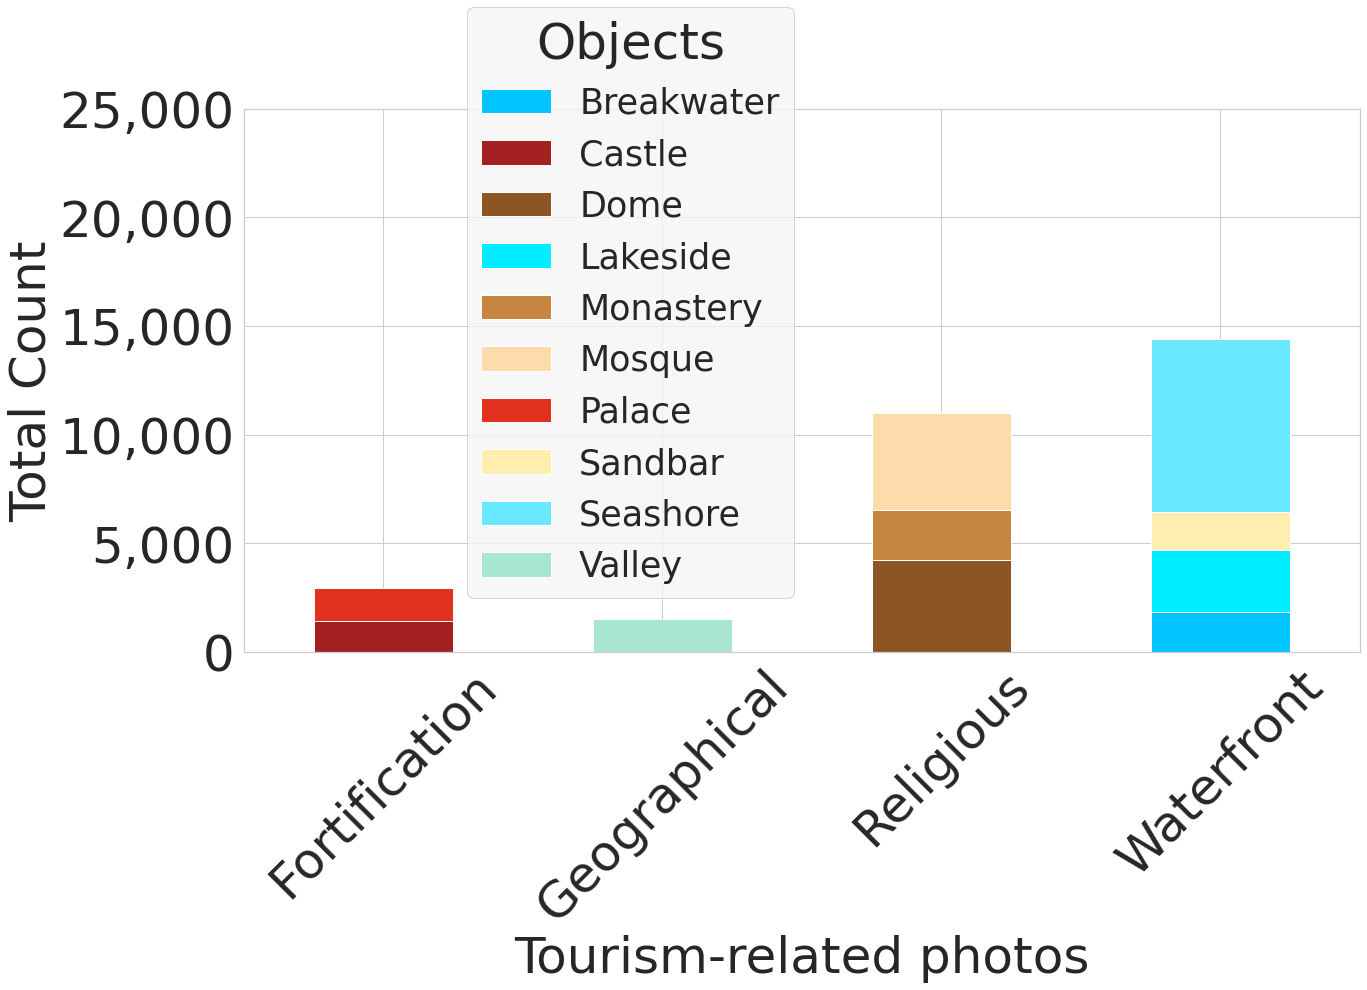

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

fontsize=50

res_1['InceptionV3_class'] = res_1['InceptionV3_class'].str.title()

combined_categories = {
    'Waterfront': ['Sandbar', 'Breakwater', 'Lakeside', 'Seashore'],
    'Religious': ['Monastery', 'Dome', 'Mosque'],
    'Fortification': ['Castle', 'Palace'],
    'Geographical': ['Valley']
}

# Create an empty DataFrame to store the counts
count_df = pd.DataFrame(columns=['Category', 'Value', 'Count', 'Group', 'Color'])

# Iterate through categories and calculate counts for each value within the array
for group, categories in combined_categories.items():
    for category in categories:
        count = res_1[res_1['InceptionV3_class'] == category]['count'].sum()
        count_df = count_df.append({'Category': group, 'Value': category, 'Count': count, 'Group': group}, ignore_index=True)

# Create the stacked bar plot using individual bars for each category
#sns.set_style("whitegrid")

# Increase the figure size
plt.rcParams["figure.figsize"] = (20, 10)

# Create the stacked bar plot
ax = count_df.pivot(index='Group', columns='Value', values='Count').plot(
    kind='bar',
    color=["#00c5ff","#a32020","#8d5524","#00ecff","#c68642","#ffdbac","#e0301e","#ffeead","#6ae8ff","#a8e6cf"],
    stacked=True,
)


#custom_colors=["#ffeead","#00c5ff","#00ecff","#6ae8ff","#8d5524","#c68642","#ffdbac","#e0301e","#a32020","#a8e6cf"]
# Set the custom legend with colors
#legend_labels = [Patch(facecolor=color, label=item) for item, color in colors.items()]
legend = ax.legend(fontsize=35, loc=(0.2, 0.1),frameon=True,facecolor='whitesmoke')
legend.set_title("Objects",prop={'size': fontsize})

#for text, color in zip(legend.get_texts(), custom_colors):
  #  text.set_color(color)

plt.xticks(fontsize=fontsize, rotation=45)
plt.yticks(fontsize=fontsize)
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel("Tourism-related photos", fontsize=fontsize)
plt.ylabel("Total Count", fontsize=fontsize)
plt.ylim(0, 25000)
plt.savefig(r'C:\Users\abiga\OneDrive - Yezreel Valley College\pyecharm\cities\figures\2.png')

plt.show()
